In [1]:
# Packages laden
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dropout, Activation, Flatten,TimeDistributed, BatchNormalization, LeakyReLU, Activation 
from keras.models import Model
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]
ZR_12=ZR[-100:]

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_100_TR, ZR_100_TE= ZR_100[0:605], ZR_100[605:len(ZR_100)]
ZR_46_TR, ZR_46_TE= ZR_46[0:250], ZR_46[250:len(ZR_46)]
ZR_12_TR, ZR_12_TE= ZR_12[0:50], ZR_12[50:len(ZR_12)]

In [5]:
# Funktion: Datensatz erstellen mit Inputs (look_back: Anzahl der verwendten Vergangenheitswerte) + Output (look_forward: 
# Vorhersagehorizont)
def timeseries_to_supervised_R(data, look_back, look_forward):
    df = DataFrame(data)
    columns = [df.shift(look_forward-1+i) for i in range(1, look_back+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    #df = df.drop(0)
    DF=df[::-1]
    df=DF[:len(df)-(look_back+look_forward-1)]
    DF=df[::-1]
    return DF

In [6]:
# Festlegung: look_back, look_forward + Anwendung der Funktion
# Inputneuronen: 12
# Vorhersagehorizont: t+1
look_back=12
look_forward=1

# Inputgröße 100%
# Trainingsdaten
ZR_100_TR_I=timeseries_to_supervised_R(ZR_100_TR, look_back, look_forward)
trainX_100, train_y_100 = ZR_100_TR_I.iloc[:, 0:-1], ZR_100_TR_I.iloc[:, -1]

# Testdaten 
ZR_100_TE_I=timeseries_to_supervised_R(ZR_100_TE, look_back, look_forward)
testX_100, test_y_100 = ZR_100_TE_I.iloc[:, 0:-1], ZR_100_TE_I.iloc[:, -1]


# Inputgröße 46%
# Trainingsdaten
ZR_46_TR_I=timeseries_to_supervised_R(ZR_46_TR, look_back, look_forward)
trainX_46, train_y_46 = ZR_46_TR_I.iloc[:, 0:-1], ZR_46_TR_I.iloc[:, -1]

# Testdaten 
ZR_46_TE_I=timeseries_to_supervised_R(ZR_46_TE, look_back, look_forward)
testX_46, test_y_46 = ZR_46_TE_I.iloc[:, 0:-1], ZR_46_TE_I.iloc[:, -1]


# Inputgröße 12%
# Trainingsdaten
ZR_12_TR_I=timeseries_to_supervised_R(ZR_12_TR, look_back, look_forward)
trainX_12, train_y_12 = ZR_12_TR_I.iloc[:, 0:-1], ZR_12_TR_I.iloc[:, -1]

# Testdaten 
ZR_12_TE_I=timeseries_to_supervised_R(ZR_12_TE, look_back, look_forward)
testX_12, test_y_12 = ZR_12_TE_I.iloc[:, 0:-1], ZR_12_TE_I.iloc[:, -1]

In [7]:
# Replizierbarkeit gewährleisten
np.random.seed(1)

In [40]:
# Modell zusammenbauen
# Dateninput: 100 %
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_100, train_y_100, epochs=20,verbose=2,validation_data=(testX_100, test_y_100))

Train on 593 samples, validate on 246 samples
Epoch 1/20
 - 1s - loss: 6038230268.5464 - val_loss: 663220581.9837
Epoch 2/20
 - 0s - loss: 384868327.1096 - val_loss: 25691279.2195
Epoch 3/20
 - 0s - loss: 45421494.6239 - val_loss: 26444358.8293
Epoch 4/20
 - 0s - loss: 46234834.4418 - val_loss: 16971621.5122
Epoch 5/20
 - 0s - loss: 30848859.4671 - val_loss: 15105556.7967
Epoch 6/20
 - 0s - loss: 29250996.3238 - val_loss: 14916294.4878
Epoch 7/20
 - 0s - loss: 27891599.4503 - val_loss: 14411682.6829
Epoch 8/20
 - 0s - loss: 27621362.0776 - val_loss: 14399646.2602
Epoch 9/20
 - 0s - loss: 27312221.0320 - val_loss: 14071951.8049
Epoch 10/20
 - 0s - loss: 26986579.3390 - val_loss: 14010640.6016
Epoch 11/20
 - 0s - loss: 26850373.2411 - val_loss: 13943990.7642
Epoch 12/20
 - 0s - loss: 27070734.6779 - val_loss: 13947746.4228
Epoch 13/20
 - 0s - loss: 26650461.5059 - val_loss: 14004281.3171
Epoch 14/20
 - 0s - loss: 26418861.4907 - val_loss: 13849192.1138
Epoch 15/20
 - 0s - loss: 26392383.

Text(0.5,1,'Loss Curves')

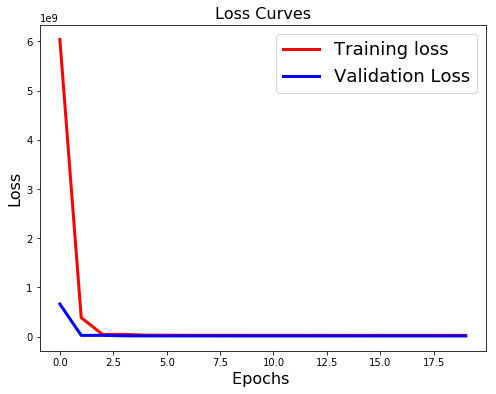

In [41]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [42]:
# Modellperformance bewerten: normalisierte Daten
trainScore = model.evaluate(trainX_100, train_y_100, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_100, test_y_100, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 25950292.75 MSE (5094.14 RMSE)
Test Score: 13776025.45 MSE (3711.61 RMSE)


In [43]:
# Vorhersagen generieren
trainPredict_100 = model.predict(trainX_100)
testPredict_100 = model.predict(testX_100)

In [44]:
# Evaluation
test_MSE=mean_squared_error(test_y_100,testPredict_100)
train_MSE=mean_squared_error(train_y_100,trainPredict_100)

print(test_MSE,train_MSE)

13776025.590242092 25950292.64147813


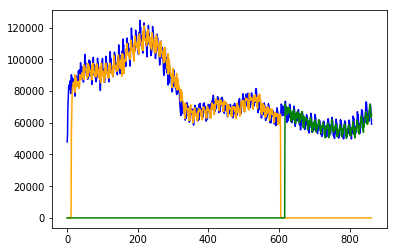

In [45]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_100)+(look_back+look_forward-1)] = trainPredict_100

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+2*(look_back+look_forward-1):len(ZR_100)+1] = testPredict_100
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [46]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [47]:
# Modell zusammenbauen
# Dateninput: 46 %
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_46, train_y_46, epochs=200, batch_size=25, verbose=2,validation_data=(testX_46, test_y_46))

Train on 238 samples, validate on 138 samples
Epoch 1/200
 - 1s - loss: 764951992.2017 - val_loss: 324707549.2174
Epoch 2/200
 - 0s - loss: 273668469.3782 - val_loss: 131627645.6232
Epoch 3/200
 - 0s - loss: 103281089.0084 - val_loss: 48465813.4493
Epoch 4/200
 - 0s - loss: 33837202.0042 - val_loss: 23434828.3478
Epoch 5/200
 - 0s - loss: 18622602.3782 - val_loss: 19380780.3261
Epoch 6/200
 - 0s - loss: 18107395.3319 - val_loss: 19093358.9710
Epoch 7/200
 - 0s - loss: 18180389.7773 - val_loss: 18707743.8261
Epoch 8/200
 - 0s - loss: 17247631.8655 - val_loss: 18150450.5725
Epoch 9/200
 - 0s - loss: 16262734.9580 - val_loss: 17808843.6449
Epoch 10/200
 - 0s - loss: 15846491.6218 - val_loss: 17468512.4493
Epoch 11/200
 - 0s - loss: 15590795.7899 - val_loss: 16936043.9058
Epoch 12/200
 - 0s - loss: 15233714.9328 - val_loss: 16638537.6667
Epoch 13/200
 - 0s - loss: 15045769.5798 - val_loss: 16441329.5290
Epoch 14/200
 - 0s - loss: 14955568.6471 - val_loss: 16227515.6594
Epoch 15/200
 - 0s -

Epoch 123/200
 - 0s - loss: 12030571.1723 - val_loss: 11777093.7029
Epoch 124/200
 - 0s - loss: 12059834.8592 - val_loss: 10999511.0072
Epoch 125/200
 - 0s - loss: 12251316.8697 - val_loss: 11737632.8406
Epoch 126/200
 - 0s - loss: 11902045.7311 - val_loss: 11038938.7101
Epoch 127/200
 - 0s - loss: 11986152.5714 - val_loss: 11299078.6957
Epoch 128/200
 - 0s - loss: 11880459.5966 - val_loss: 11732053.4022
Epoch 129/200
 - 0s - loss: 11732080.9769 - val_loss: 10952648.5580
Epoch 130/200
 - 0s - loss: 11669224.6597 - val_loss: 11345267.8225
Epoch 131/200
 - 0s - loss: 11688010.5126 - val_loss: 11082011.5290
Epoch 132/200
 - 0s - loss: 11617474.5714 - val_loss: 11352556.6051
Epoch 133/200
 - 0s - loss: 11570766.5462 - val_loss: 10996125.6522
Epoch 134/200
 - 0s - loss: 11569506.8487 - val_loss: 10992098.8188
Epoch 135/200
 - 0s - loss: 11529638.7080 - val_loss: 11180983.9710
Epoch 136/200
 - 0s - loss: 11669340.8067 - val_loss: 11071380.5652
Epoch 137/200
 - 0s - loss: 11508427.4748 - val_

Text(0.5,1,'Loss Curves')

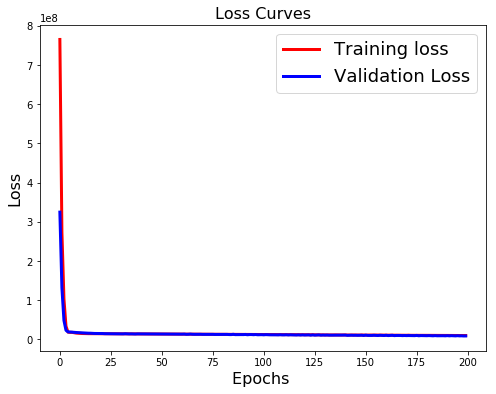

In [48]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [49]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_46, train_y_46, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_46, test_y_46, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 10009893.97 MSE (3163.84 RMSE)
Test Score: 9023571.09 MSE (3003.93 RMSE)


In [50]:
# Vorhersagen generieren
trainPredict_46 = model.predict(trainX_46)
testPredict_46 = model.predict(testX_46)

In [51]:
# Evaluation
test_MSE=mean_squared_error(test_y_46,testPredict_46)
train_MSE=mean_squared_error(train_y_46,trainPredict_46)

print(test_MSE,train_MSE)

9023571.314395849 10009893.648266576


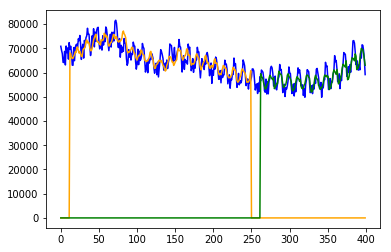

In [52]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_46))
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_46)+(look_back+look_forward-1)] = trainPredict_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot=testPredictPlot.reshape(len(ZR_46))
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(trainPredict_46)+2*(look_back+look_forward-1):len(ZR_46)+1] = testPredict_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [8]:
# Replizierbarkeit gewährleisten
np.random.seed(2)

In [9]:
# Modell zusammenbauen
# Dateninput: 12 %
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_12, train_y_12, epochs=200,batch_size=25, verbose=2,validation_data=(testX_12, test_y_12))

Train on 38 samples, validate on 38 samples
Epoch 1/200
 - 1s - loss: 1528878012.6316 - val_loss: 1931504161.6842
Epoch 2/200
 - 0s - loss: 1470576151.5789 - val_loss: 1857323351.5789
Epoch 3/200
 - 0s - loss: 1413339466.1053 - val_loss: 1783433020.6316
Epoch 4/200
 - 0s - loss: 1355305192.4211 - val_loss: 1709968330.1053
Epoch 5/200
 - 0s - loss: 1298457003.7895 - val_loss: 1636915749.0526
Epoch 6/200
 - 0s - loss: 1241759450.9474 - val_loss: 1564786310.7368
Epoch 7/200
 - 0s - loss: 1185285268.2105 - val_loss: 1493759531.7895
Epoch 8/200
 - 0s - loss: 1130923981.4737 - val_loss: 1424080986.9474
Epoch 9/200
 - 0s - loss: 1077003346.5263 - val_loss: 1355682556.6316
Epoch 10/200
 - 0s - loss: 1025502622.3158 - val_loss: 1288546202.9474
Epoch 11/200
 - 0s - loss: 973471415.5789 - val_loss: 1223482300.6316
Epoch 12/200
 - 0s - loss: 923578413.4737 - val_loss: 1159693537.6842
Epoch 13/200
 - 0s - loss: 874454881.6842 - val_loss: 1097361194.1053
Epoch 14/200
 - 0s - loss: 826220666.9474 - v

Epoch 121/200
 - 0s - loss: 13733603.9737 - val_loss: 18140749.2632
Epoch 122/200
 - 0s - loss: 13733259.8684 - val_loss: 18140815.3947
Epoch 123/200
 - 0s - loss: 13718298.7895 - val_loss: 18114128.1316
Epoch 124/200
 - 0s - loss: 13719014.6316 - val_loss: 18071602.8947
Epoch 125/200
 - 0s - loss: 13734216.4474 - val_loss: 18050672.6316
Epoch 126/200
 - 0s - loss: 13731473.3421 - val_loss: 18052786.8947
Epoch 127/200
 - 0s - loss: 13718453.2105 - val_loss: 18058637.9211
Epoch 128/200
 - 0s - loss: 13716478.8947 - val_loss: 18064568.8684
Epoch 129/200
 - 0s - loss: 13710102.3947 - val_loss: 18056481.1053
Epoch 130/200
 - 0s - loss: 13713269.5000 - val_loss: 18051780.6053
Epoch 131/200
 - 0s - loss: 13705938.2632 - val_loss: 18057495.6579
Epoch 132/200
 - 0s - loss: 13701428.7368 - val_loss: 18054044.6316
Epoch 133/200
 - 0s - loss: 13696847.7105 - val_loss: 18042715.9737
Epoch 134/200
 - 0s - loss: 13689266.6316 - val_loss: 18023803.6316
Epoch 135/200
 - 0s - loss: 13696318.7895 - val_

Text(0.5,1,'Loss Curves')

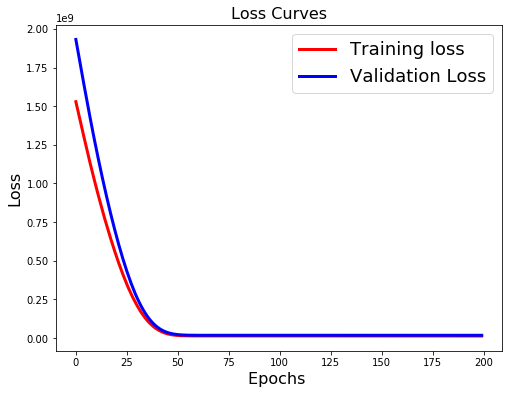

In [10]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [11]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_12, train_y_12, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_12, test_y_12, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 13500549.05 MSE (3674.31 RMSE)
Test Score: 17918245.32 MSE (4232.99 RMSE)


In [12]:
# Vorhersagen generieren
trainPredict_12 = model.predict(trainX_12)
testPredict_12 = model.predict(testX_12)

17918245.19701787 13500548.890776785


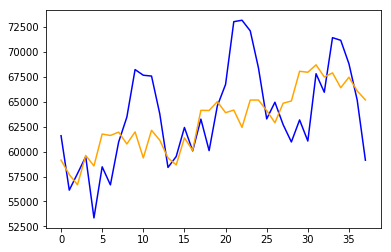

In [14]:
# Evaluation
test_MSE=mean_squared_error(test_y_12,testPredict_12)
train_MSE=mean_squared_error(train_y_12,trainPredict_12)

print(test_MSE,train_MSE)

# Vorhersage gegen Testdaten abtragen
plt.plot(ZR_12[-len(testPredict_12):], color='blue')
plt.plot(testPredict_12, color='orange')
plt.show()

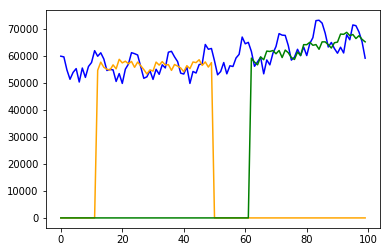

In [91]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_12)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_12))
trainPredictPlot[:]=[0]*len(ZR_12)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_12),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_12)+(look_back+look_forward-1)] = trainPredict_12

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_12)
testPredictPlot=testPredictPlot.reshape(len(ZR_12))
testPredictPlot[:]=[0]*len(ZR_12)
testPredictPlot = testPredictPlot.reshape(len(ZR_12),1)
testPredictPlot[len(trainPredict_12)+2*(look_back+look_forward-1):len(ZR_12)+1] = testPredict_12
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_12, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()